comparison of my datasets

In [8]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Hypothesis:
Certain categories of financial products (like credit cards or credit reporting) generate more complaints than others, and specific complaint types may reveal systemic issues within these products

In [11]:
# Loading the dataset
df = pd.read_csv('complaints.csv')
df.head(20)

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
5,5,credit_reporting,payment history missing credit report made mis...
6,6,credit_reporting,va date complaint experian credit bureau invol...
7,7,credit_reporting,account reported abbreviated name full name se...
8,8,credit_reporting,account reported abbreviated name full name se...
9,9,credit_reporting,usdoexxxx account reported abbreviated name fu...


In [15]:
# Explore the unique product categories
product_counts = df['product'].value_counts()
product_counts

product
credit_reporting       91179
debt_collection        23150
mortgages_and_loans    18990
credit_card            15566
retail_banking         13536
Name: count, dtype: int64

C:\Users\delir\AppData\Local\Temp\ipykernel_21440\1504821117.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index, y=product_counts.values, palette="viridis")


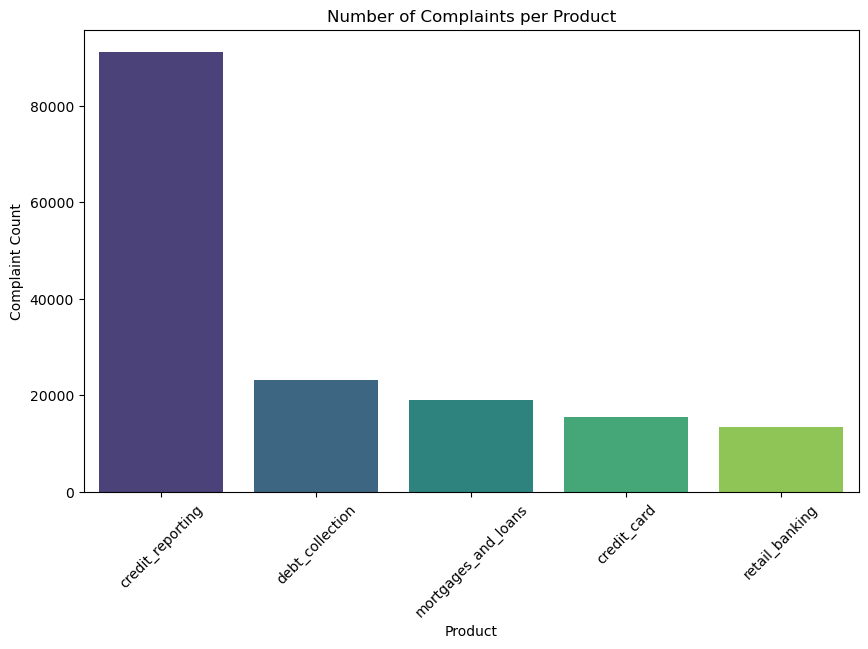

In [17]:
# visuals on the product repartition in the dataset
plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.index, y=product_counts.values, palette="viridis")
plt.title('Number of Complaints per Product')
plt.xlabel('Product')
plt.ylabel('Complaint Count')
plt.xticks(rotation=45)
plt.show()

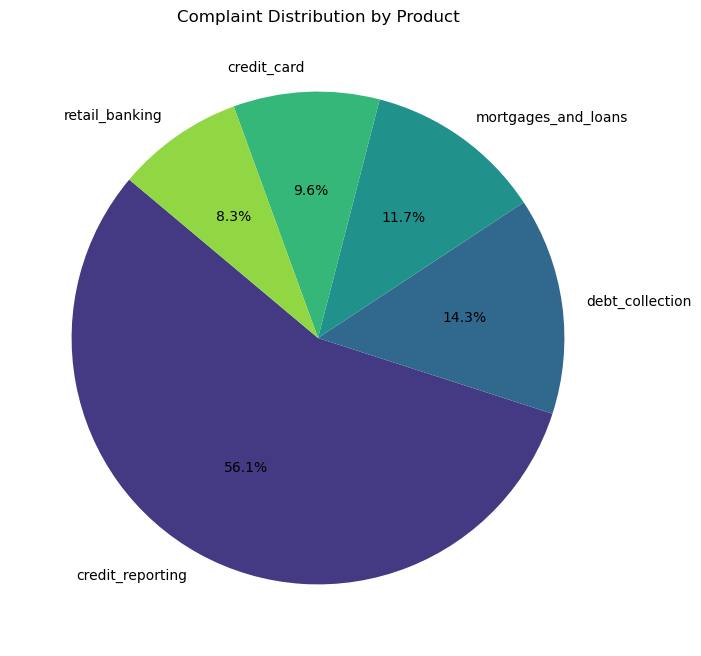

In [19]:
# bar plot for data representation
plt.figure(figsize=(8, 8))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(product_counts)))
plt.title('Complaint Distribution by Product')
plt.show()

In [21]:
# checking for null values
print("\nMissing Values per Column:")
print(df.isnull().sum())



Missing Values per Column:
Unnamed: 0     0
product        0
narrative     10
dtype: int64


Data Cleaning

In [25]:
# Remove rows with missing 'narrative' text
df.dropna(subset=['narrative'], inplace=True)
df.head(100)

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
95,95,debt_collection,rent recovery solution extorting multiple peop...
96,96,credit_card,see approved without impact credit got experia...
97,97,credit_reporting,thank submitting complaint cfpb complaint port...
98,98,credit_reporting,transunion continue refresh outdated account o...


In [ ]:
df.dropna(subset=['narrative'], inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)
df['narrative'] = df['narrative'].str.lower()
df['narrative'] = df['narrative'].str.replace(r'[^a-z\s]', '', regex=True)

In [50]:
# checking for null values after removing them
print(df['narrative'].isnull().sum())


0


In [27]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(50)

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...
5,credit_reporting,payment history missing credit report made mis...
6,credit_reporting,va date complaint experian credit bureau invol...
7,credit_reporting,account reported abbreviated name full name se...
8,credit_reporting,account reported abbreviated name full name se...
9,credit_reporting,usdoexxxx account reported abbreviated name fu...


In [29]:
# lower case and Remove special characters and numbers
df['narrative'] = df['narrative'].str.lower()
df['narrative'] = df['narrative'].str.replace(r'[^a-z\s]', '', regex=True)

In [31]:
df['word_count'] = df['narrative'].apply(lambda x: len(x.split()))
print("\nNarrative Word Count Statistics:")
print(df['word_count'].describe())


Narrative Word Count Statistics:
count    162411.000000
mean         80.232798
std         108.872213
min           1.000000
25%          27.000000
50%          50.000000
75%          95.000000
max        2685.000000
Name: word_count, dtype: float64


Tokenization

In [54]:
def process_narrative(narrative):
    tokens = nltk.word_tokenize(narrative)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    
    # adding line to remove all tokens with numbers and punctuation
    stopwords_punc_and_numbers_removed = [word for word in stopwords_removed if word.isalpha()]
    
    return stopwords_punc_and_numbers_removed

In [36]:
# lemmatization
from nltk.stem import WordNetLemmatizer
# Download WordNet if necessary
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
# Apply lemmatization
df['narrative'] = df['narrative'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\delir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


C:\Users\delir\AppData\Local\Temp\ipykernel_21440\3256120849.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts_cleaned.index, y=product_counts_cleaned.values, palette="viridis")


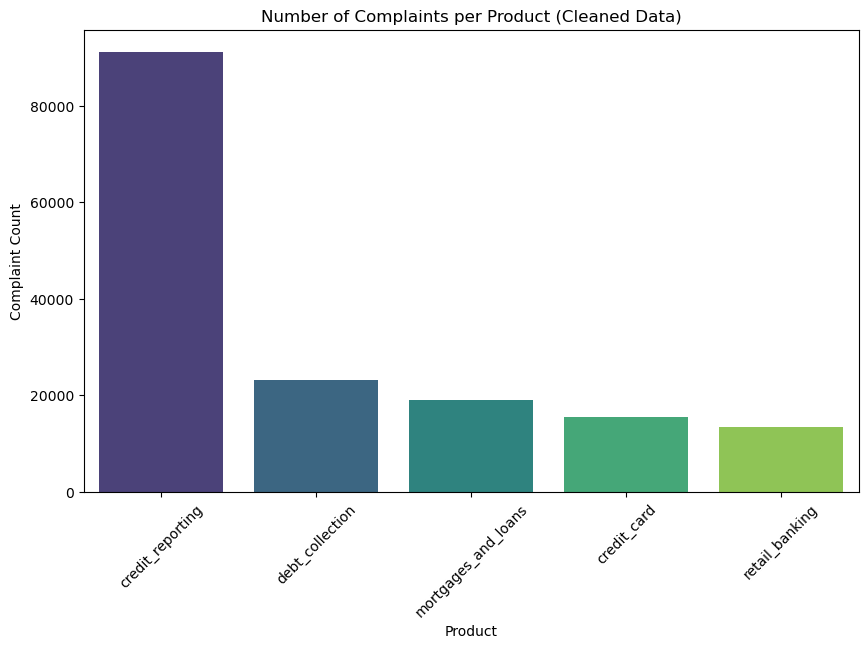

In [38]:
# Recalculate product counts after cleaning
product_counts_cleaned = df['product'].value_counts()

# Bar plot for number of complaints per product
plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts_cleaned.index, y=product_counts_cleaned.values, palette="viridis")
plt.title("Number of Complaints per Product (Cleaned Data)")
plt.xlabel("Product")
plt.ylabel("Complaint Count")
plt.xticks(rotation=45)
plt.show()


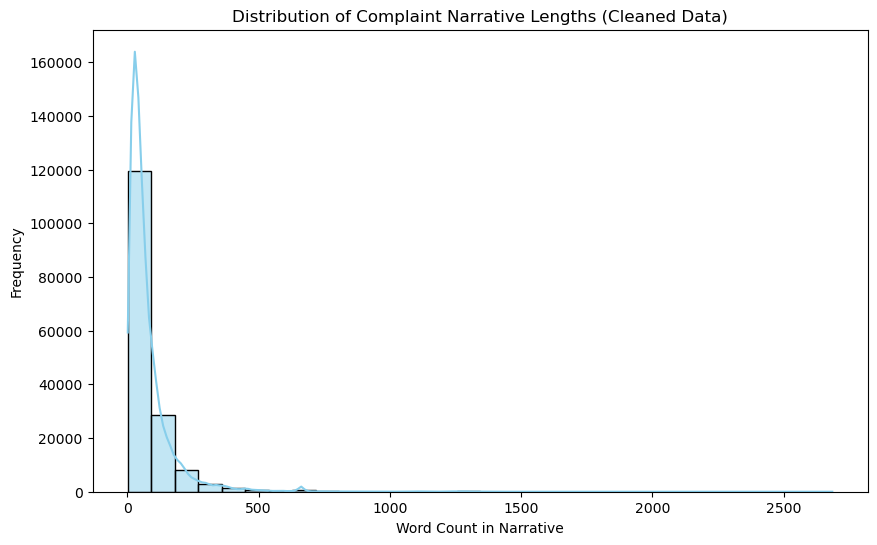

In [40]:
# Recalculate word count after cleaning
df['word_count'] = df['narrative'].apply(lambda x: len(x.split()))

# Histogram for distribution of complaint narrative lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Complaint Narrative Lengths (Cleaned Data)")
plt.xlabel("Word Count in Narrative")
plt.ylabel("Frequency")
plt.show()


In [44]:
!pip install wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ---------------------------------------  297.0/301.4 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 3.7 MB/s eta 0:00:00


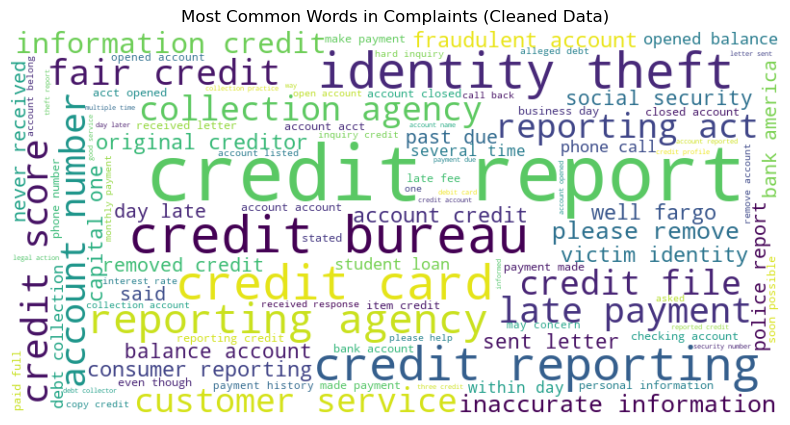

In [46]:
from wordcloud import WordCloud

# Concatenate all narratives into a single string for the word cloud
all_words_cleaned = ' '.join(df['narrative'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(all_words_cleaned)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Complaints (Cleaned Data)")
plt.show()

C:\Users\delir\AppData\Local\Temp\ipykernel_21440\2005631863.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='product', columns='length_category', aggfunc='size', fill_value=0)


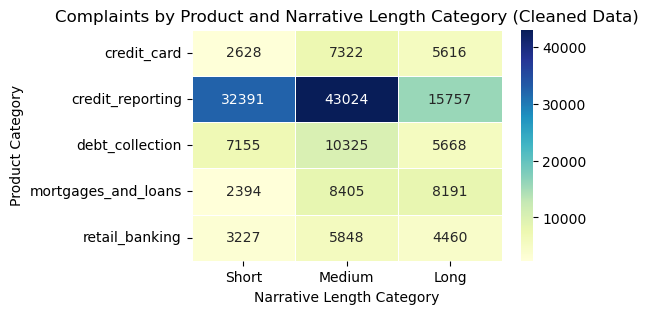

In [98]:
# Categorize word counts into length categories
df['length_category'] = pd.cut(df['word_count'], bins=[0, 30, 95, df['word_count'].max()], labels=['Short', 'Medium', 'Long'])

# Create pivot table for heatmap data
heatmap_data = df.pivot_table(index='product', columns='length_category', aggfunc='size', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title("Complaints by Product and Narrative Length Category (Cleaned Data)")
plt.xlabel("Narrative Length Category")
plt.ylabel("Product Category")
plt.show()


In [62]:
# from nltk.corpus import stopwords
# import nltk
# # Download stopwords if necessary
# nltk.download('stopwords')
# # Define English stopwords
# stop_words = set(stopwords.words('english'))
# # Remove stopwords
# df['narrative'] = df['narrative'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\delir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
from nltk.stem import WordNetLemmatizer
# Download WordNet if necessary
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
# Apply lemmatization
df['narrative'] = df['narrative'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\delir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score
# from sklearn.metrics import plot_confusion_matrix
# from scoring_functions import scoring_functions as f
# import imp
import matplotlib.pyplot as plt


In [ ]:
df.shape
df

In [ ]:
df['product'].unique()

In [56]:
# Train-test split
X = df.drop(['product'], axis=1)
y = df['product']
X_train, X_test, y_train, y_test = train_test_split(X['narrative'], y, test_size=0.20, random_state=200)

In [58]:
X_train.shape

(129928,)

In [60]:
X_test.shape

(32483,)

In [62]:
y_train.head()

27719        credit_reporting
52012     mortgages_and_loans
13722         debt_collection
155658       credit_reporting
95945        credit_reporting
Name: product, dtype: object

In [ ]:

# vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=1000000)
# vect_X_train = vectorizer.fit_transform(X_train)
# # feature_names =  vectorizer.get_feature_names()
# feature_names = vectorizer.get_feature_names_out()


In [66]:
# Fit_transform 
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=1000000)
vect_X_train = vectorizer.fit_transform(X_train)
vect_X_test = vectorizer.transform(X_test)

In [68]:
# Label enconding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [70]:
# Model Initialization and Training
cls = MultinomialNB()
cls.fit(vect_X_train, y_train_encoded)

# Predictions
y_train_pred = cls.predict(vect_X_train)  # Prediction on training set
y_test_pred = cls.predict(vect_X_test)    # Prediction on test set

# Print accuracy on training set
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Print accuracy on test set
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Calculate Precision, Recall, F1-Score for both train and test sets
train_precision = precision_score(y_train_encoded, y_train_pred, average='macro', zero_division=0)
test_precision = precision_score(y_test_encoded, y_test_pred, average='macro', zero_division=0)

train_recall = recall_score(y_train_encoded, y_train_pred, average='macro', zero_division=0)
test_recall = recall_score(y_test_encoded, y_test_pred, average='macro', zero_division=0)

train_f1 = f1_score(y_train_encoded, y_train_pred, average='macro')
test_f1 = f1_score(y_test_encoded, y_test_pred, average='macro')

print(f'Training Precision: {train_precision * 100:.2f}%')
print(f'Test Precision: {test_precision * 100:.2f}%')

print(f'Training Recall: {train_recall * 100:.2f}%')
print(f'Test Recall: {test_recall * 100:.2f}%')

print(f'Training F1-Score: {train_f1 * 100:.2f}%')
print(f'Test F1-Score: {test_f1 * 100:.2f}%')

# Classification Report for both train and test sets
print("Classification Report for Training Data:")
print(classification_report(y_train_encoded, y_train_pred))

print("Classification Report for Test Data:")
print(classification_report(y_test_encoded, y_test_pred))

Training Accuracy: 71.97%
Test Accuracy: 66.88%
Training Precision: 89.83%
Test Precision: 87.11%
Training Recall: 49.83%
Test Recall: 40.82%
Training F1-Score: 57.93%
Test F1-Score: 47.21%
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.94      0.26      0.40     12444
           1       0.67      1.00      0.80     73015
           2       0.95      0.22      0.36     18501
           3       0.97      0.54      0.70     15193
           4       0.96      0.47      0.63     10775

    accuracy                           0.72    129928
   macro avg       0.90      0.50      0.58    129928
weighted avg       0.80      0.72      0.68    129928

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.89      0.16      0.27      3122
           1       0.63      1.00      0.77     18157
           2       0.93      0.15      0.26      4647
           3       0.96   

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your test predictions y_test_pred and true labels y_test_encoded
cm = confusion_matrix(y_test_encoded, y_test_pred)


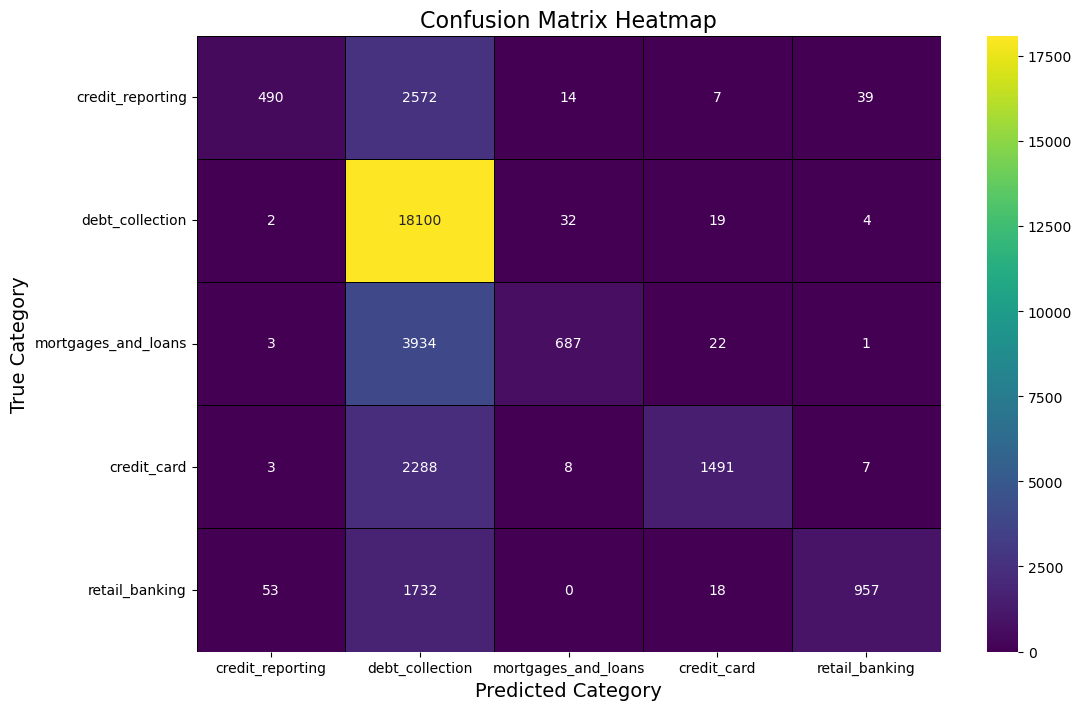

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming y_test_encoded and y_test_pred are your actual and predicted labels respectively
categories = ['credit_reporting' ,'debt_collection' ,'mortgages_and_loans' ,'credit_card' ,'retail_banking'] 
 # Replace with your actual categories
cm = confusion_matrix(y_test_encoded, y_test_pred)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=categories, columns=categories)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(cm_df, annot=True, fmt='d', cmap='viridis', cbar=True, linewidths=0.5, linecolor='black')

# Add titles and labels
plt.title('Confusion Matrix Heatmap', fontsize=16)
plt.xlabel('Predicted Category', fontsize=14)
plt.ylabel('True Category', fontsize=14)

# Show the plot
plt.show()


In [82]:
import pandas as pd

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['MultinomialNB'],  # or add more models here as you compare them
    'Train Accuracy': [train_accuracy * 100],
    'Test Accuracy': [test_accuracy * 100],
    'Train Precision': [train_precision * 100],
    'Test Precision': [test_precision * 100],
    'Train Recall': [train_recall * 100],
    'Test Recall': [test_recall * 100],
    'Train F1-Score': [train_f1 * 100],
    'Test F1-Score': [test_f1 * 100]
})

print(results_df)


           Model  Train Accuracy  Test Accuracy  Train Precision  \
0  MultinomialNB       71.966782      66.881138          89.8322   

   Test Precision  Train Recall  Test Recall  Train F1-Score  Test F1-Score  
0       87.114512     49.832198    40.821325       57.933158      47.210738  


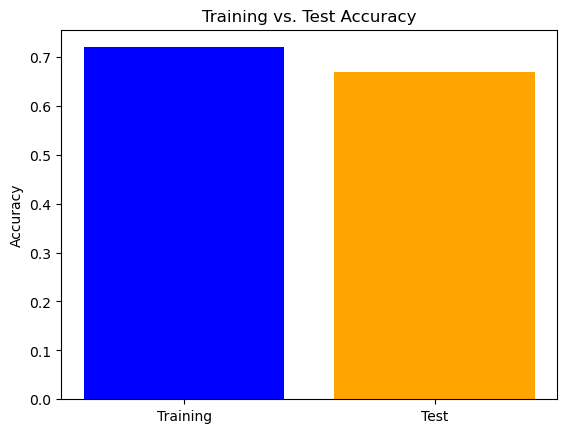

In [86]:
import matplotlib.pyplot as plt

# Example data
train_acc = [train_accuracy]
test_acc = [test_accuracy]

# Plot the data as bars
labels = ['Training', 'Test']

plt.bar(labels, [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Training vs. Test Accuracy')
plt.show()

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Define the model
model = MultinomialNB()

# Define the parameter grid (we are tuning the alpha parameter)
param_grid = {
    'alpha': [0.1, 0.5, 1, 2, 5]  # Different values for the smoothing parameter
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the training data
grid_search.fit(vect_X_train, y_train_encoded)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_model.predict(vect_X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print(classification_report(y_test_encoded, y_pred_test))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters: {'alpha': 0.1}
Test Accuracy: 86.85%
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      3122
           1       0.92      0.92      0.92     18157
           2       0.85      0.72      0.78      4647
           3       0.77      0.88      0.82      3797
           4       0.88      0.85      0.86      2760

    accuracy                           0.87     32483
   macro avg       0.83      0.83      0.83     32483
weighted avg       0.87      0.87      0.87     32483



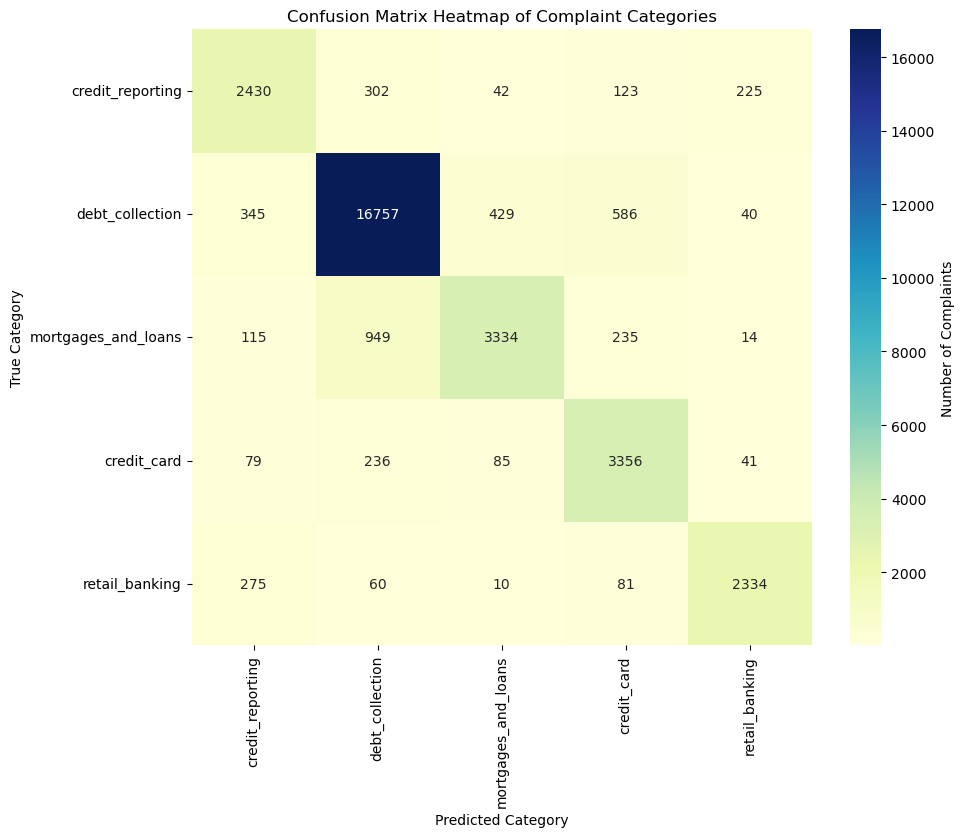

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Define the actual category names for decoding
category_names = ["credit_reporting" ,"debt_collection" ,"mortgages_and_loans" ,"credit_card" ,"retail_banking"] 


# Assuming y_test_encoded and y_pred_test are your true and predicted labels
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_test)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=category_names, yticklabels=category_names,
            cbar_kws={'label': 'Number of Complaints'})

# Add labels and title
plt.xlabel("Predicted Category")
plt.ylabel("True Category")
plt.title("Confusion Matrix Heatmap of Complaint Categories")
plt.show()


Fitting 5 folds for each of 5 candidates, totalling 25 fits


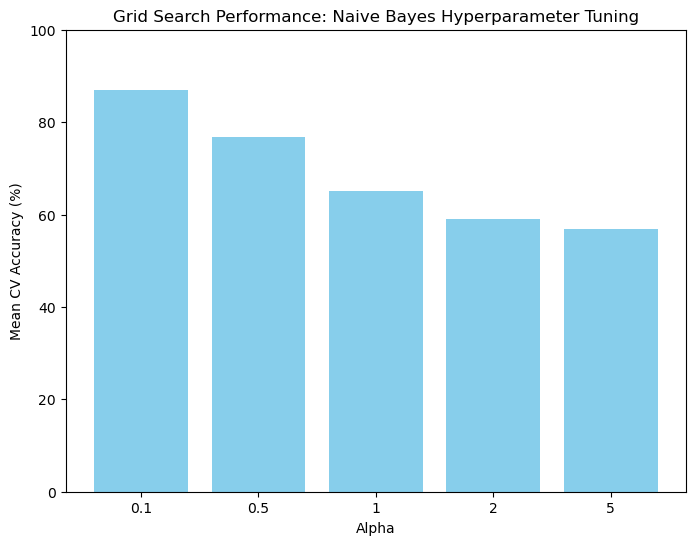

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Example: Grid search for Naive Bayes model hyperparameter tuning
param_grid = {
    'alpha': [0.1, 0.5, 1, 2, 5]  # Values of the alpha hyperparameter to tune
}

# Define the model
model = MultinomialNB()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit grid search on training data
grid_search.fit(vect_X_train, y_train_encoded)

# Get the results from GridSearchCV
results = grid_search.cv_results_

# Create a DataFrame for easier visualization
results_df = pd.DataFrame(results)

# Extract the mean test scores (cross-validation scores) and the corresponding hyperparameter values
mean_test_scores = results_df['mean_test_score']  # The mean score across all cross-validation folds
alpha_values = results_df['param_alpha'].astype(str)  # The alpha hyperparameter values (as strings for clarity)

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(alpha_values, mean_test_scores * 100, color='skyblue')
plt.xlabel('Alpha')
plt.ylabel('Mean CV Accuracy (%)')
plt.title('Grid Search Performance: Naive Bayes Hyperparameter Tuning')
plt.ylim(0, 100)  # Set y-axis to show percentage
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Model Initialization and Training
cls = RandomForestClassifier(random_state=42)  # You can adjust parameters as needed
cls.fit(vect_X_train, y_train_encoded)

# Predictions
y_train_pred = cls.predict(vect_X_train)  # Prediction on training set
y_test_pred = cls.predict(vect_X_test)    # Prediction on test set

# Print accuracy on training set
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Print accuracy on test set
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Calculate Precision, Recall, F1-Score for both train and test sets
train_precision = precision_score(y_train_encoded, y_train_pred, average='macro', zero_division=0)
test_precision = precision_score(y_test_encoded, y_test_pred, average='macro', zero_division=0)

train_recall = recall_score(y_train_encoded, y_train_pred, average='macro', zero_division=0)
test_recall = recall_score(y_test_encoded, y_test_pred, average='macro', zero_division=0)

train_f1 = f1_score(y_train_encoded, y_train_pred, average='macro')
test_f1 = f1_score(y_test_encoded, y_test_pred, average='macro')

print(f'Training Precision: {train_precision * 100:.2f}%')
print(f'Test Precision: {test_precision * 100:.2f}%')

print(f'Training Recall: {train_recall * 100:.2f}%')
print(f'Test Recall: {test_recall * 100:.2f}%')

print(f'Training F1-Score: {train_f1 * 100:.2f}%')
print(f'Test F1-Score: {test_f1 * 100:.2f}%')

# Classification Report for both train and test sets
print("Classification Report for Training Data:")
print(classification_report(y_train_encoded, y_train_pred))

print("Classification Report for Test Data:")
print(classification_report(y_test_encoded, y_test_pred))


In [ ]:
import numpy as np

def predict_complaint_category(new_complaint, vectorizer, model):
    """
    Predicts the category of a new complaint narrative.
    
    Parameters:
    new_complaint (str): The complaint narrative to classify.
    vectorizer (TfidfVectorizer): The TF-IDF vectorizer fitted on the training data.
    model: The trained classification model.
    
    Returns:
    str: The predicted category of the complaint.
    """
    # Step 1: Transform the new complaint using the fitted vectorizer
    complaint_vector = vectorizer.transform([new_complaint])
    
    # Step 2: Use the trained model to predict the category
    predicted_category_index = model.predict(complaint_vector)
    
    # Step 3: Return the predicted category (assuming you have a mapping of indices to category names)
    # Here, we are assuming you have a label encoder to convert indices back to category names
    return label_encoder.inverse_transform(predicted_category_index)[0]

# Example usage
new_complaint = "My mortgage application has been in processing for over two months, and I'm getting anxious because my house closing date is approaching. I would like an update on the status of my application."
predicted_category = predict_complaint_category(new_complaint, vectorizer, best_model)
print(f"The predicted category for the complaint is: {predicted_category}")


In [96]:
import joblib

# Save the trained model
joblib.dump(best_model, 'best_model.pkl')

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Save the label encoder if you're using one
joblib.dump(label_encoder, 'label_encoder.pkl')



['label_encoder.pkl']